Header

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import MultinomialNB

In [2]:
spam_df = pd.read_csv('emails.csv')

In [3]:
spam_df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [4]:
spam_df[spam_df['spam'] == 0]  #print the rows which have Non spam mesages

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [5]:
spam_df[spam_df['spam'] == 1]   #print all the rows which are spam messages

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [6]:
non_spam = spam_df[spam_df['spam'] == 0]
spam = spam_df[spam_df['spam'] == 1]

<Axes: xlabel='spam', ylabel='count'>

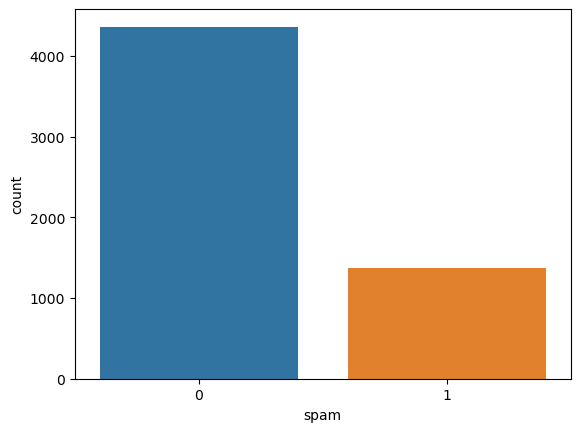

In [7]:
sns.countplot(x = 'spam', data = spam_df, label = 'Spam vs Ham')

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorized_data = vectorizer.fit_transform(spam_df['text'])

In [11]:
print(vectorizer.get_feature_names_out()[10000:10050]) # it will print the word between 10000 - 10050

['coral' 'coralreef' 'coram' 'corba' 'corbally' 'corbel' 'corbett'
 'corbitt' 'cord' 'cordate' 'cordes' 'cordial' 'cordiality' 'cordially'
 'cordinating' 'cordless' 'core' 'corei' 'corel' 'corestaff' 'corey'
 'corgy' 'corka' 'corley' 'corman' 'corn' 'cornel' 'cornelia' 'cornell'
 'corner' 'cornerstone' 'cornett' 'corney' 'cornfield' 'cornfloor' 'corny'
 'coronach' 'coronal' 'corp' 'corpc' 'corpcustserv' 'corpjobsl'
 'corpoffice' 'corpora' 'corporal' 'corporate' 'corporatemetrics'
 'corporates' 'corporation' 'corporations']


Splitting our data into input and output

In [13]:
X = vectorized_data    #instead of spam_df['Text']
y = spam_df['spam']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

### Apply Multinomial Naive Bayes on the Data

In [16]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()


MultinomialNB()
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [17]:
y_pred = NB_classifier.predict(X_test)

In [19]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_pred, y_test)

0.9804723016477073

In [24]:
y_pred_train = NB_classifier.predict(X_train)

In [25]:
roc_auc_score(y_train, y_pred_train)

0.9965056479881926

## Testing the model with new messages

In [39]:
emails = ['Hey Pratik, can we go for a football match tomorrow at 7:30 PM IST.',
         'Upto 20% discount on latest styles, exclusive offer only available for few hours. Shop Now.',
         'Get annual cashback of upto inr 18000 with Standard Chartered smart credit card.',
         'Congratulation!! you got an offer']

In [40]:
emails_vectorized = vectorizer.transform(emails)

In [41]:
NB_classifier.predict(emails_vectorized)

array([0, 1, 1, 0], dtype=int64)